### Importing necessary libraries

In [1]:
import numpy as np
from pywt import wavedec
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import  graphviz_layout
import networkx as nx
import pandas as pd
import seaborn as sns

plt.rcParams['figure.figsize'] = [25, 20]     


def genData(param, show = False):
	a=[]
	if param[0]=="normal":
		mu, sigma, s = param[1],   param[2], param[3]
		a= np.random.normal(mu, sigma, size=s)
	elif param[0]=='uniform':
		mi, ma,s=param[1],   param[2], param[3]
		a= np.random.uniform(mi, ma, s)
	elif param[0]=="poisson":
		rate,s=param[1],   param[2]
		a = np.random.poisson(rate, s)
	if(show):
		count, bins, ignored = plt.hist(s, 14, density=True)
	return a

In [2]:
def genSample(signalCount):
    print("generate sample data")
    signals = [] 
    for i in range(signalCount):
        a = genData(["normal", 100,100,8])
        #print(a)
        sig = [] 
        for j in range(8):
            sig.append(int(a[j]))
        signals.append(sig)
    for i in range(signalCount):
        print(signals[i])
    return signals

In [3]:
def getSamplePredef():
    print("return sample data")
    signals = [[105, 220, 23, 99, 266, 190, 37, 5],
                [334, 174, 134, -7, 19, 155, 93, 89],
                [72, 96, 102, 151, -14, 171, 127, 127],
                [151, 38, 283, 204, 232, 141, 121, 47],
                [157, -60, 54, 54, 69, -27, -14, 101],
                [0, 113, 74, 176, 68, 322, 135, 367],
                [56, 114, 126, 181, 93, 41, 118, 76],
                [164, 200, 351, 51, 36, 163, 298, -5],
                [140, 124, 99, 34, -46, -5, 240, 136],
                [113, 58, 130, 123, 171, 143, 109, 17],
                [-8, 299, 65, 62, 130, 146, -43, 23],
                [-96, 212, 56, 150, -55, 150, 151, 70],
                [-22, 148, 219, 62, 108, 136, 198, 126],
                [220, 84, 165, 167, 1, 227, 15, 144],
                [0, 135, 165, 64, 100, 224, 244, 140],
                [211, 183, -161, 65, 33, 257, -16, 112]]
    return signals

In [4]:
def mergeList(input_data, verbose= False):
    if verbose:
        print("merge data")
    merged_list = []
    for l in input_data:
        merged_list += list(l)
    return merged_list

In [5]:
def listToPandasDF(input_data):
    df = pd.DataFrame(input_data)
    return df

In [6]:
def getWaveletCoefs(input_data):
    coefs = [] 
    for i in range(len(input_data)):
        girdi = np.array(input_data[i]) #np.array([1,2,3,4,5,6,7,8])*1
        coeff = wavedec(girdi, 'haar', level=int(np.log2(len(girdi))))
        coefs.append(mergeList(coeff))
    return coefs

In [7]:
def plotCorrelation(input_data_frame):
    Var_Corr = input_data_frame.corr()
    # plot the heatmap and annotation on it
    sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)
    plt.show()
    # Basic correlogram
    sns_plot = sns.pairplot(input_data_frame)
    plt.show()

In [8]:
def generateOperations(operations_count, Test = False, verbose= False):
    energy = 0 
    all=[]
    for i in range(operations_count):
        if(verbose):print(i, end="\t")
        a = genData(["uniform", 0,10,4])    
        a= [int(x) for x in a]
        if(True):#Test):
            a[3]=0
            
        all.append(a)
        #print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)
        if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
            if(verbose):
                print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
        elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
            if(verbose):print(int(a[0]) , "+", int(a[2]) ,"= ?")
        elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
            if(int(a[2])<int(a[0])):
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))
            else:
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  - int(a[0])))          
        elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
            if(verbose):print(int(a[0]) , "-", int(a[2]) ,"= ?")        
        
        elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
            if(verbose):print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
        elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
            if(verbose):print(int(a[0]) , "*", int(a[2]) ,"= ?")
        
        elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
            if(int(a[2])!=0):
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
            elif(int(a[0])!=0):
                if(verbose):print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  / int(a[0])))    
        
        elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
            if(verbose):print(int(a[0]) , "/", int(a[2]) ,"= ?")
    return all

In [9]:
def decodeOperations(all):
    for i in range(1):
        print(i, end="\t")
        a = all[i]
        #print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)
        if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
            print(int(a[0]) , "+", int(a[2]) ,"=", int(a[0])  + int(a[2]))
        elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
            print(int(a[0]) , "+", int(a[2]) ,"= ?")
        elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
            if(int(a[2])<int(a[0])):
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  - int(a[2])))
            else:
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  - int(a[0])))          
        elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
            print(int(a[0]) , "-", int(a[2]) ,"= ?")        
        elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
            print(int(a[0]) , "*", int(a[2]) ,"=", int(a[0])  * int(a[2]))
        elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
            print(int(a[0]) , "*", int(a[2]) ,"= ?")
        elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
            if(int(a[2])>0):
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[0])  / int(a[2])))
            else:
                print(int(a[0]) , "/", int(a[2]) ,"=", int(int(a[2])  / int(a[0])))    
        elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
            print(int(a[0]) , "/", int(a[2]) ,"= ?")

In [10]:
def quantize(input_data, len_of_data, verbose = False):
    borders = [-200,-100,-50,0, 50, 100, 200]
    qsignals = [] 

    for i in range(len(input_data)):
        sig = [] 
        if(verbose):
            print(input_data[i])
        for j in range(int(len(input_data[i]))):
            output = 7
            for k in range(7):
                if( input_data[i][j] < borders[k]):
                    output = k
                    break
            if verbose:
                print(output, end = " ")
            sig.append(k)
        if verbose:
            print()
        qsignals.append(sig)
    return qsignals

In [11]:
def decodeOperationsDeeper(input_data, len_data, qsignals, verbose = False):
    inputs = [] 
    for i in range(len_data):

        if (verbose):print(i, end="\t")
        a = input_data[i]
        if(verbose):print(int(a[0]) , int(a[1])%4, int(a[2]) ,int(a[3])%2)

        if(int(a[1])%4==0 and int(a[3])%2 == 0  ):
            if(int(a[0])  + int(a[2]) < 10):
                if(verbose):
                    print( qsignals[int(a[0])] , "+", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  + int(a[2])])            
                    print( qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  + int(a[2])])            
                inputs.append([ qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] , qsignals[int(a[0])  + int(a[2])]])            
        elif(int(a[1])%4==0 and int(a[3])%2 == 1 ):
            if(verbose):
                print( qsignals[int(a[0])] , "+", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] , qsignals[10], qsignals[int(a[2])] , qsignals[14]])

        elif(int(a[1])%4==1 and int(a[3])%2 == 0  ):
            if(int(a[2])<int(a[0])):
                if(verbose):
                    print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  - int(a[2])])
                    print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  - int(a[2])])
                inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[int(a[0])  - int(a[2])]])
            else:
                if(verbose):
                    print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[int(a[2])  - int(a[0])])   
                    print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[int(a[2])  - int(a[0])])   
                inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[int(a[2])  - int(a[0])]])

        elif(int(a[1])%4==1 and int(a[3])%2 == 1  ):
            if(verbose):
                print( qsignals[int(a[0])] , "-", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] , qsignals[11], qsignals[int(a[2])] , qsignals[14]])        

        elif(int(a[1])%4==2 and int(a[3])%2 == 0  ):
            if(int(a[0])  * int(a[2]) < 10):
                if(verbose):
                    print( qsignals[int(a[0])] , "*", qsignals[int(a[2])] ,"=", qsignals[int(a[0])  * int(a[2])])
                    print( qsignals[int(a[0])] , qsignals[12], qsignals[int(a[2])] ,"=", qsignals[int(a[0])  * int(a[2])])
                inputs.append( [qsignals[int(a[0])] , qsignals[12], qsignals[int(a[2])] , qsignals[int(a[0])  * int(a[2])]])
        elif(int(a[1])%4==2 and int(a[3])%2 == 1 ):
            if(verbose):
                print( qsignals[int(a[0])] , "*", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] ,  qsignals[12], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] ,  qsignals[12], qsignals[int(a[2])] , qsignals[14]])
        elif(int(a[1])%4==3 and int(a[3])%2 == 0  ):
            if(int(a[2])>0):            
                if(verbose):
                    print( qsignals[int(a[0])] , "/", qsignals[int(a[2])] ,"=", qsignals[int( int(a[0])  /int(a[2]))])
                    print( qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] ,"=", qsignals[int(int(a[0])  /int(a[2]))])
                inputs.append( [qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] , qsignals[ int(int(a[0])  /int(a[2]))]])

        elif(int(a[1])%4==3 and int(a[3])%2 == 1  ):
            if(verbose):
                print( qsignals[int(a[0])] , "/", qsignals[int(a[2])] ,"=", qsignals[14])
                print( qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] ,"=", qsignals[14])
            inputs.append( [qsignals[int(a[0])] , qsignals[13], qsignals[int(a[2])] , qsignals[14]])
    return inputs




In [12]:
def initTree():
    GG=nx.DiGraph()    
    GG.add_node(0, k=999,cc=1, id = -1,food =0)    
    return GG,1

In [13]:
def train_tree(input_data, GG, counter , WL, overlap):
    plt.rcParams.update({'font.size': 22})
    data1= input_data  
    print(data1)
    poz = 0
    #print(len(data1)/WL)    
    step = WL-overlap

    for i in range(0,len(data1)-step+1, step):
        #if(data1[i:i+step]==[0,0,1,0] or  data1[i:i+step]==[1,0,0,0] ):
        #    //print(str(i)+ " food")
        poz=0
        for j in range(WL):
            # data
            d=data1[i + j]
            #print(d, end=' ')
            #print (d)
            # neighbours 
            nei= list(GG.neighbors(poz))       
            if len(nei)==0:
                #print (counter, poz, data1[i: i+step])
                GG.add_node(counter,k=d, cc=1, id = -1,food =0)    
                GG.add_edge(poz,counter)
                poz=counter
                counter +=1
            else:
                k=-1
                for n in nei:
                    if(GG.node[n]['k']==d):
                        k=n
                        break
                if(k>=0):
                    poz=k
                    GG.node[k]['cc'] = GG.node[k]['cc'] + 1
                else:
                    GG.add_node(counter,k=d,cc=1, id = -1,food =0)    
                    GG.add_edge(poz,counter)
                    poz=counter
                    counter += 1
    finalNodes = [] 
    for i in range(1, counter):
        yol =  nx.shortest_path(GG,0,i)
        if(len(yol) >WL):
            GG.node[yol[-1]]['id']=len(finalNodes)
            finalNodes.append(yol[-1])
    return GG, counter


In [14]:
def plotGraph(GG, WL, counter):
    plt.rcParams['figure.figsize'] = [15, 10]        
    labels=dict((n,d['k']) for n,d in GG.nodes(data=True))   
    #pos=nx.graphviz_layout(GG, prog='dot')
    pos =graphviz_layout(GG, prog='dot')
    #nx.spring_layout(GG)

    plt.title("node values")
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
    plt.show()

    plt.title("node ids")
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True )
    plt.show()

    plt.title("node frequency")
    labels=dict((n,d['cc']) for n,d in GG.nodes(data=True))   
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
    plt.show()

    

    plt.title("final nodes ids")
    labels=dict((n,d['id']) for n,d in GG.nodes(data=True))   
    nx.draw_networkx(GG,  pos=pos, arrows=True, with_labels=True, labels=labels )
    plt.show()    

In [15]:
symbols= genSample(16)
symbols= ( getWaveletCoefs(symbols))
print()
for i in range(len(symbols)):
    #print(symbols[i])
    print(i,[ int(j) for j in symbols[i]])
#a= getSamplePredef()


generate sample data
[65, 139, -2, 138, 77, 290, 114, -7]
[39, 18, 71, -138, 49, 181, 77, 218]
[50, 29, 254, 1, 60, 0, 142, 146]
[-47, 178, 208, 134, 93, -66, 108, -101]
[234, 49, 192, 102, 124, 1, -6, 147]
[218, 231, 66, 206, 159, -96, 139, 25]
[101, 28, 84, -104, 162, 99, 80, -76]
[96, 96, 55, 127, -46, 58, 0, 29]
[78, 228, 88, 84, 54, 105, 155, 204]
[284, 106, 93, -25, 92, 157, -45, 89]
[210, 205, 125, -58, 172, 169, 44, -24]
[-68, 99, 215, 240, 77, 184, 194, 10]
[94, 83, 162, 192, 85, 66, 330, 29]
[137, 18, 334, 78, -33, 243, 56, 73]
[117, 119, -110, 103, 98, 43, 209, 364]
[168, -7, 134, 133, 237, 113, 79, 71]

0 [287, -47, 34, 130, -52, -98, -150, 85]
1 [182, -189, 62, -32, 14, 147, -93, -99]
2 [241, -4, -88, -114, 14, 178, 42, -2]
3 [179, 155, -105, 10, -159, 52, 112, 147]
4 [298, 109, -5, -7, 130, 63, 86, -108]
5 [335, 174, 88, -50, -9, -98, 180, 80]
6 [132, -55, 74, 128, 51, 132, 44, 110]
7 [146, 117, 5, -8, 0, -50, -73, -20]
8 [352, -14, 67, -100, -106, 2, -36, -34]
9 [265, 58

In [16]:
def buildAbstractTree(GG, symbols, ops,counter):
    #print(b)
    decodedOps=decodeOperationsDeeper(input_data=ops,len_data=20, qsignals= quantize(symbols,len_of_data=4) )
    
    GG,counter = train_tree( mergeList(mergeList(decodedOps)), GG, counter , WL, overlap)
    plotGraph(GG,WL,counter)
    return GG, counter


In [17]:
def buildContextTree(GG, ops,counter,WL, overlap=0):
    #print(b)
    #decodedOps=decodeOperationsDeeper(input_data=ops,len_data=20, qsignals= quantize(symbols,len_of_data=4) )
    
    GG,counter = train_tree( ops, GG, counter , WL, overlap)
    plotGraph(GG,WL,counter)
    return GG, counter

# Build the abstract tree

[[7, 4, 8, 0], [0, 7, 8, 0], [0, 6, 1, 0], [8, 7, 7, 0], [0, 9, 7, 0], [4, 8, 1, 0], [9, 3, 7, 0], [7, 3, 0, 0], [9, 7, 4, 0], [2, 4, 3, 0], [8, 1, 2, 0], [8, 8, 6, 0], [4, 3, 8, 0], [2, 4, 6, 0], [8, 0, 7, 0], [6, 9, 6, 0], [6, 4, 4, 0], [2, 9, 3, 0], [3, 3, 0, 0], [5, 9, 7, 0], [1, 3, 2, 0], [0, 2, 2, 0], [7, 2, 4, 0], [9, 7, 5, 0], [6, 2, 1, 0], [4, 6, 9, 0], [4, 4, 5, 0], [1, 6, 0, 0], [3, 2, 3, 0], [4, 6, 6, 0], [5, 3, 6, 0], [1, 5, 4, 0], [2, 7, 9, 0], [3, 3, 5, 0], [7, 1, 2, 0], [6, 1, 8, 0], [8, 0, 8, 0], [0, 8, 8, 0], [2, 8, 5, 0], [4, 5, 7, 0], [3, 6, 8, 0], [4, 3, 9, 0], [1, 2, 4, 0], [6, 0, 0, 0], [8, 4, 0, 0], [5, 9, 6, 0], [3, 1, 6, 0], [2, 7, 4, 0], [9, 2, 1, 0], [8, 9, 8, 0], [4, 5, 3, 0], [0, 5, 2, 0], [7, 1, 3, 0], [4, 1, 6, 0], [3, 0, 0, 0], [9, 6, 2, 0], [9, 0, 8, 0], [5, 6, 0, 0], [1, 2, 4, 0], [6, 1, 9, 0], [1, 0, 9, 0], [9, 9, 9, 0], [5, 9, 3, 0], [2, 5, 7, 0], [5, 6, 7, 0], [7, 5, 3, 0], [9, 7, 2, 0], [7, 0, 5, 0], [7, 9, 6, 0], [4, 7, 9, 0], [5, 2, 3, 0], [5, 5

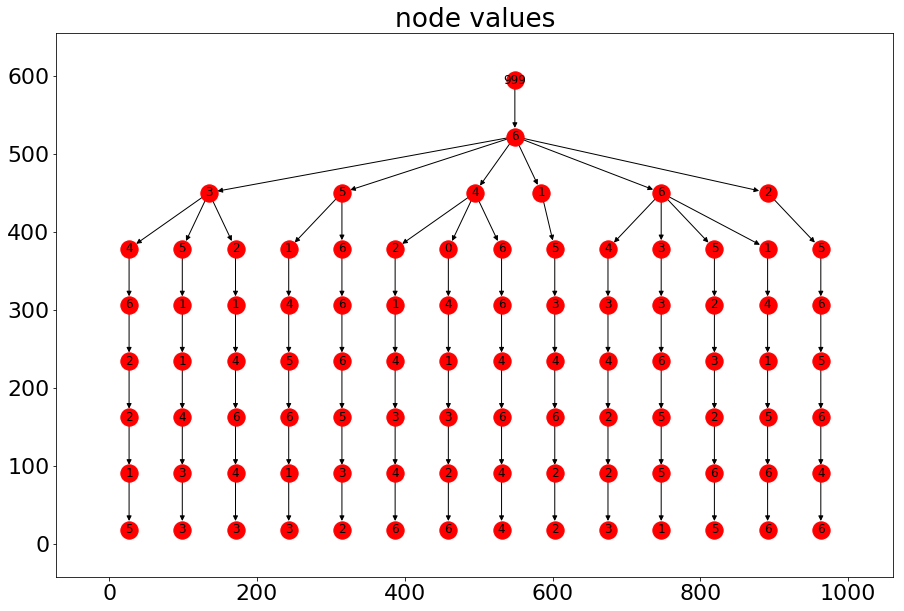

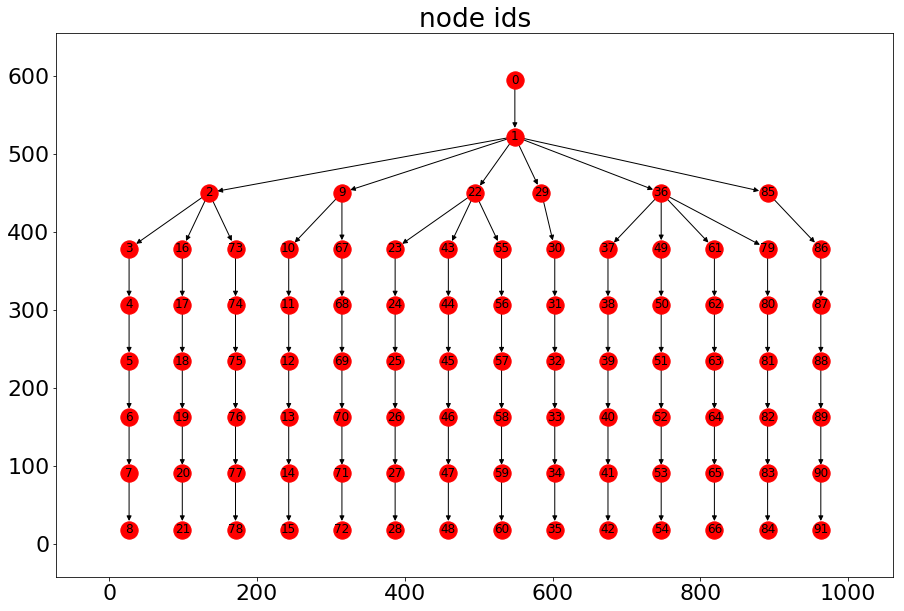

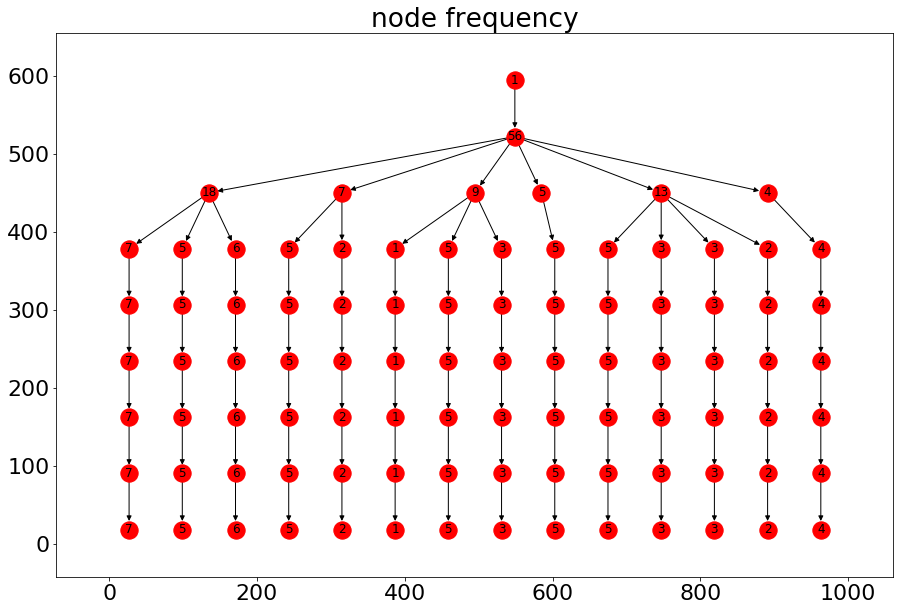

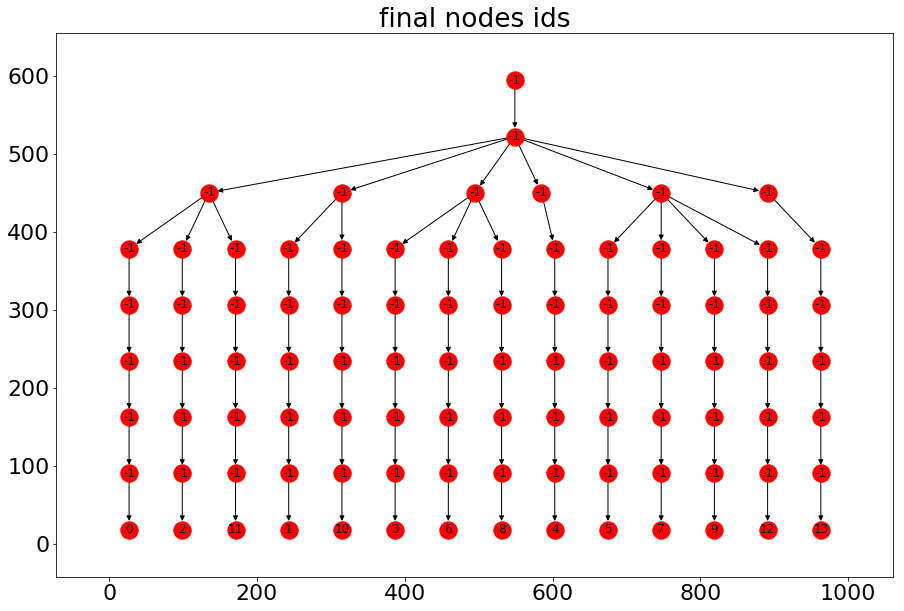

In [18]:
#GG= initTree()
WL = 8 # window length
overlap = 0# int(WL/5)
GG,counter = initTree()


ops=generateOperations(100)
print(ops)
GG,counter = buildAbstractTree(GG, symbols, ops, counter)
#print(GG.node[0])
#print(counter)



plt.title("samples in time domain")
plt.plot(np.array(a).T)
plt.show()

plt.title("samples in wavelet domain")
plt.plot(np.array(aa).T)
plt.show()

plt.title("samples in time domain")
plotCorrelation(listToPandasDF(np.array(a).T))
plt.show()
plt.title("samples in wavelet domain")
plotCorrelation(listToPandasDF(np.array(aa).T))
for j in range(len(aa)):
    print([int(i) for i in aa[j]])


In [20]:
def getBranchId(branch,GG, counter , WL, overlap):    
    ids = []
    plt.rcParams.update({'font.size': 22})
    data1= branch  
    
    poz = 0
    #print(len(data1)/WL)    
    step = WL-overlap
    
    for i in range(0,len(data1)-step+1, step):
        k=0
        poz=0
        #print()
        for j in range(WL):
            # data
            d=data1[i + j]
            
            # neighbours 
            nei= list(GG.neighbors(poz))       
            if len(nei)==0:
                k=-1
                break
            else:
                k=-1
                for n in nei:
                    if(GG.node[n]['k']==d):
                        k=n
                        break
                if(k>=0):
                    poz=k                    
                    #GG.node[k]['cc'] = GG.node[k]['cc'] + 1
                else:
                    k=-1
                    break
        #ids.append(k)
        
        #ids.append(GG.node[k]['id'])
        if(k>0):
            ids.append(GG.node[k]['id'])
        else:
            ids.append(-1)
    return ids


# test the abstract with some operations

In [21]:
WL = 4 # window length
overlap = 0# int(WL/5)
GG1,counter1 = initTree()

In [22]:
ops=generateOperations(500, Test=False,verbose = False)

0	9 + 7 = 16
1	4 / 8 = 0
2	1 + 6 = 7
3	9 / 3 = 6
4	7 / 4 = 1
5	9 / 3 = 3
6	5 * 2 = 10
7	8 / 1 = 8
8	1 + 2 = 3
9	5 / 6 = 1
10	6 + 3 = 9
11	0 + 8 = 8
12	5 / 2 = 3
13	4 / 7 = 3
14	3 * 0 = 0
15	5 * 8 = 40
16	0 / 6 = 6
17	0 + 0 = 0
18	4 / 1 = 4
19	8 / 8 = 0
20	8 + 9 = 17
21	5 * 4 = 20
22	6 / 4 = 1
23	7 * 8 = 56
24	5 + 1 = 6
25	9 / 0 = 9
26	9 / 5 = 4
27	8 + 5 = 13
28	8 + 6 = 14
29	3 / 9 = 0
30	9 + 6 = 15
31	6 + 3 = 9
32	6 * 5 = 30
33	0 + 0 = 0
34	7 / 5 = 2
35	5 + 3 = 8
36	8 + 8 = 16
37	7 / 1 = 6
38	0 + 0 = 0
39	4 + 6 = 10
40	7 / 2 = 3
41	6 * 5 = 30
42	1 / 1 = 0
43	3 * 2 = 6
44	45	8 * 4 = 32
46	3 / 5 = 0
47	8 + 4 = 12
48	8 / 7 = 1
49	1 / 2 = 1
50	2 * 9 = 18
51	4 / 4 = 0
52	1 / 2 = 1
53	8 * 6 = 48
54	1 + 5 = 6
55	6 / 4 = 2
56	7 + 6 = 13
57	5 + 5 = 10
58	5 + 4 = 9
59	0 / 1 = 1
60	5 + 6 = 11
61	2 / 4 = 2
62	0 * 6 = 0
63	4 + 1 = 5
64	8 / 1 = 7
65	0 * 8 = 0
66	0 + 9 = 9
67	0 * 9 = 0
68	2 / 5 = 0
69	7 * 7 = 49
70	3 / 8 = 5
71	6 * 2 = 12
72	4 / 3 = 1
73	4 * 3 = 12
74	5 + 8 = 13
75	7 / 5 = 2
76	77	5 

In [43]:
ops=generateOperations(500, Test=False,verbose = True)
#print((ops))

decodedOps=decodeOperationsDeeper(input_data=ops,len_data=len(ops), qsignals= quantize(symbols,len_of_data=4) )
    
#GG,counter = train_tree( mergeList(mergeList(decodedOps)), GG, counter , WL, overlap)
#print(decodedOps)

ids = getBranchId(mergeList(mergeList(decodedOps)),GG, counter,8, overlap)

print(ids)
ops= mergeList(ops)


0	0 + 1 = 1
1	4 * 0 = 0
2	3 / 2 = 1
3	6 / 8 = 2
4	5 / 5 = 1
[5, 8, 4, 4, 3, 7, 5, 5, 9, 1, 10, 4, 11, 1, 6, 10, 2, -1, 2, 4]


In [22]:
ids1 = getBranchId([6, 8, 7, 6, 0, 1, 6, 0, 2, 9, 10, 2, 0, 1, 2, 3, 10, 1, 6, 10],GG1, counter1,4, overlap)
print(ids1)

[-1, -1, -1, -1, -1]


[0, 4, 1, 0, 4, 2, 0, 0, 3, 9, 2, 0, 6, 9, 8, 0, 5, 7, 5, 0]
[[0, 0, 1, 4], [0, 0, 2, 4], [0, 2, 3, 9], [0, 6, 8, 9], [0, 5, 5, 7]]
[[0, 0, 1, 4], [0, 0, 2, 4], [0, 2, 3, 9], [0, 6, 8, 9], [0, 5, 5, 7]]


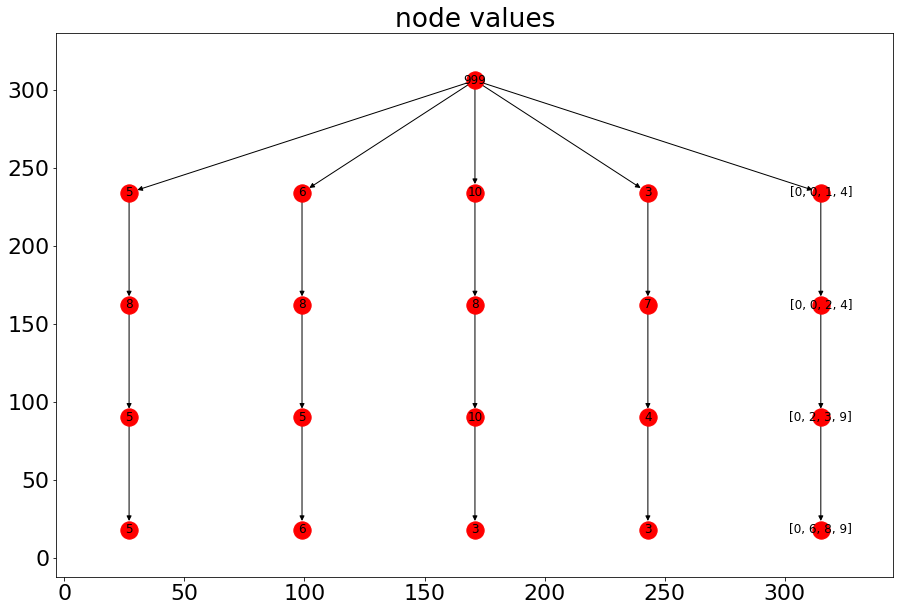

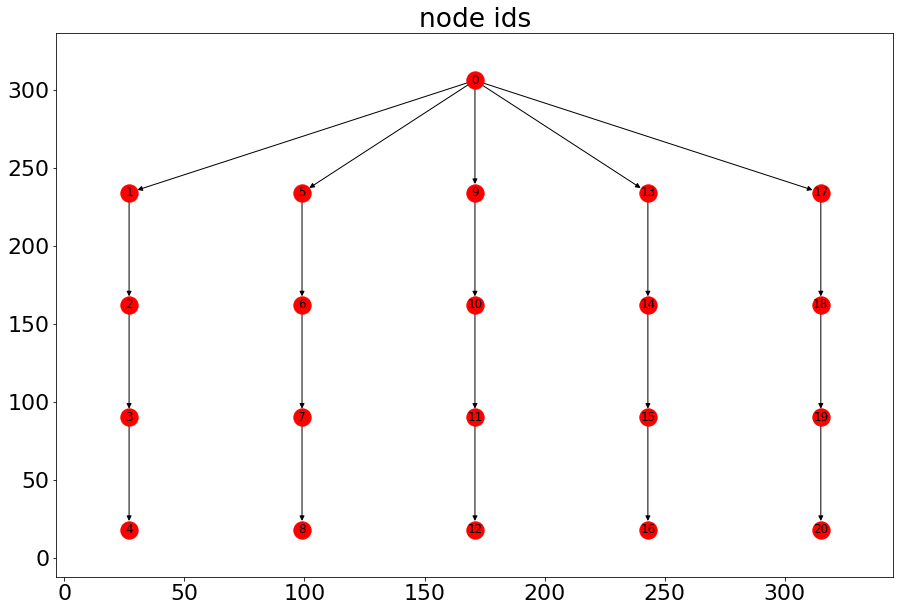

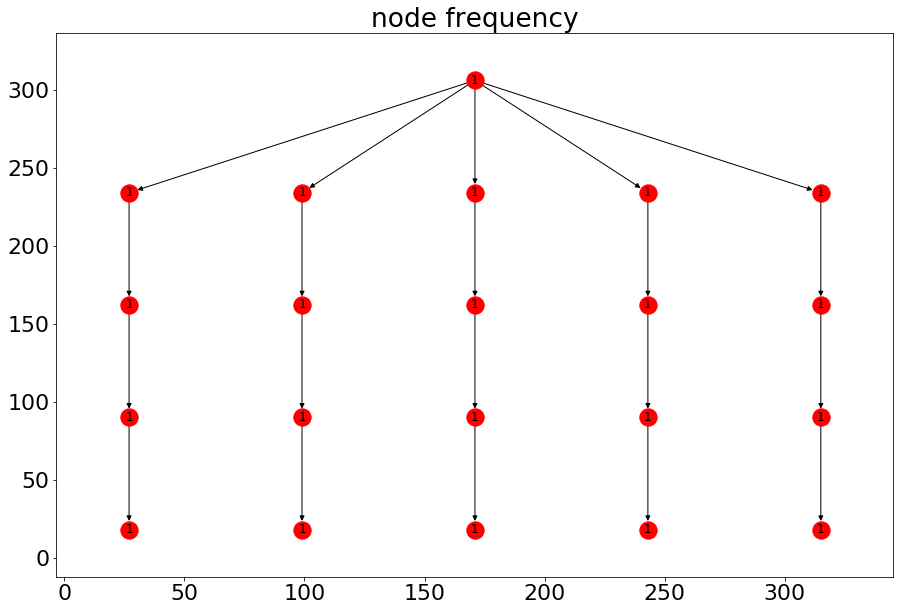

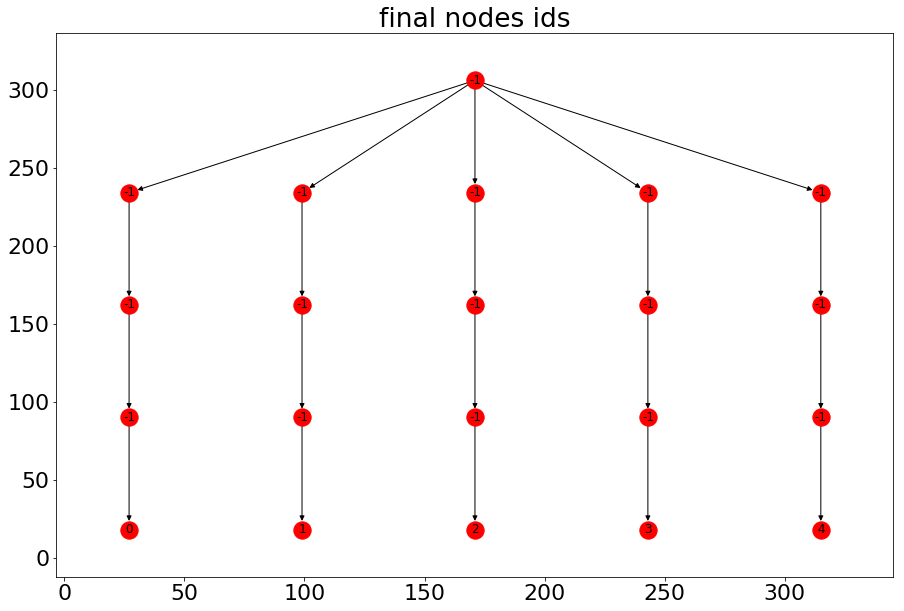

In [47]:
WL=4

#
print(ops)

b=[]
for i in range(int(len(ops)/WL)):
    c= ops[i*WL:(i+1)*WL]   
    c.sort()    
    b.append(c)
    
print(b)
GG1,counter1 = buildContextTree(GG1, b, counter1,WL)

In [48]:
ops=generateOperations(5, Test=False,verbose = True)
#print((ops))

decodedOps=decodeOperationsDeeper(input_data=ops,len_data=len(ops), qsignals= quantize(symbols,len_of_data=4) )
    
#GG,counter = train_tree( mergeList(mergeList(decodedOps)), GG, counter , WL, overlap)
#print(decodedOps)

ids2 = getBranchId(mergeList(mergeList(decodedOps)),GG, counter,8, overlap)


print(ids)
ops= mergeList(ops)

ids1 = getBranchId(ids2,GG1, counter1,4, overlap)
print(ids1)


0	6 / 4 = 1
1	6 / 4 = 2
2	0 / 0 = 0
3	0 * 2 = 0
4	9 * 1 = 9
[5, 8, 4, 4, 3, 7, 5, 5, 9, 1, 10, 4, 11, 1, 6, 10, 2, -1, 2, 4]
[-1, -1, -1, -1, -1]


In [ ]:
WL=4

#
print(ops)

b=[]
for i in range(int(len(ops)/WL)):
    c= ops[i*WL:(i+1)*WL]   
    c.sort()    
    b.append(c)
    
print(b)

# Test functions

In [24]:
ops=generateOperations(5)
print()
print()
print("ops = ", ops)
print()
print()
#decodedOps=decodeOperationsDeeper(input_data=ops,len_data=len(ops), qsignals= quantize(symbols,len_of_data=4) )
print()
print()


#print(decodedOps)

0	2 + 9 = ?
1	7 + 8 = 15
2	2 / 5 = ?
3	0 - 2 = ?
4	3 / 5 = 0


ops =  [[2, 8, 9, 7], [7, 0, 8, 8], [2, 3, 5, 7], [0, 1, 2, 5], [3, 3, 5, 8]]






In [48]:
symbols= genSample(16)
wsymbols = getWaveletCoefs(symbols)
print()
for i in range(len(wsymbols)):
    print(i,wsymbols[i])
qsymbols = quantize(wsymbols)
print()
for i in range(len(qsymbols)):
    print(i,qsymbols[i])

generate sample data
[64, -3, 187, 26, 91, 201, 198, 143]
[115, 68, 2, 154, 71, -57, 214, -61]
[125, -48, 145, 168, 215, 20, 96, 230]
[147, 62, -18, 63, 107, 67, 1, -65]
[95, 145, 122, -36, 172, 56, 252, 40]
[58, 151, -49, 7, -13, 185, 18, 193]
[45, -38, 6, 70, 168, 76, 119, 122]
[63, 42, 193, 223, 153, 42, 343, 143]
[187, 120, 66, 37, -63, 84, 32, 93]
[213, 60, 322, 29, 372, 110, 359, 90]
[134, 74, 207, -1, 88, 158, 119, 198]
[109, -12, 53, 160, -46, 179, -32, 114]
[381, 103, 169, 94, 298, -84, 61, 41]
[-17, 161, 35, 28, -17, 66, -14, 55]
[16, 102, 36, 45, 214, 124, 21, -23]
[181, 23, 77, 103, 179, -150, -61, 169]

0 [320.6729252680994, -126.9256672229853, -76.00000000000003, -24.5, 47.37615433949869, 113.84419177103416, -77.78174593052023, 38.89087296526013]
1 [178.89801564019658, 60.81118318204313, 13.500000000000014, -69.5, 33.23401871576773, -107.48023074035524, 90.50966799187809, 194.45436482630058]
2 [336.22927445420345, -60.45762979144985, -118.00000000000003, -45.5000000000000

In [35]:
for i in range(2):
    for j in range(4):
        print(ops[i][j], end = "")
    print()
    

2897
7088


In [55]:
for i in range(len(symbols)):
    for j in range():
        
nosySymbols= symbols

In [57]:
print(nosySymbols+3)

TypeError: can only concatenate list (not "int") to list

In [54]:
decodeOpes(ops,2,qsymbols)

0	2 0 9 1
[6, 2, 1, 3, 6, 3, 6, 2] + [6, 1, 3, 4, 6, 6, 6, 6] = [6, 3, 4, 6, 2, 3, 5, 4]
[6, 2, 1, 3, 6, 3, 6, 2] [6, 2, 4, 3, 4, 6, 3, 2] [6, 1, 3, 4, 6, 6, 6, 6] = [6, 3, 4, 6, 2, 3, 5, 4]
1	7 0 8 0


[[[6, 2, 1, 3, 6, 3, 6, 2],
  [6, 2, 4, 3, 4, 6, 3, 2],
  [6, 1, 3, 4, 6, 6, 6, 6],
  [6, 3, 4, 6, 2, 3, 5, 4]]]

In [40]:
a= [4,3,2,1, 5,4,3,2,]

b=[]
for i in range(2):
    c= a[i*4:(i+1)*4]   
    c.sort()    
    b.append(c)
b=mergeList(b)
print(a)
print(b)

[4, 3, 2, 1, 5, 4, 3, 2]
[1, 2, 3, 4, 2, 3, 4, 5]
